In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
# Features: house sizes in 1000 sqft
x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])

# Targets : corresponding house prices in $1000s
y = np.array([300.0, 320.0, 340.0, 360.0, 380.0, 400.0, 420.0, 440.0, 460.0, 480.0, 500.0])

print(x)
print(y)

# the first (feature, target) pair
print((x[0], y[0]))


[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
[300. 320. 340. 360. 380. 400. 420. 440. 460. 480. 500.]
(1.0, 300.0)


In [6]:
# the number of training examples (data points)
m= x.shape[0]

# there is 2 ways : 
print(m)
print(len(x))

11
11


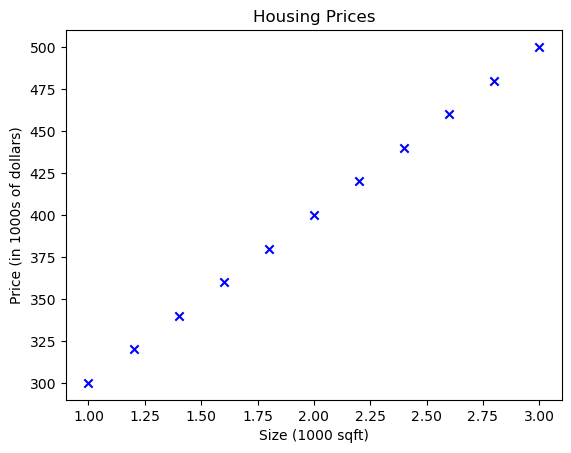

In [7]:
# Plot the data points 
plt.scatter(x, y, marker='x', c='b')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

cost function formula :

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [8]:
def cost_function(w, b):
    '''    
    Parameters:
        w (float): weight of the model
        b (float): bias of the model
    
    Returns:
        final_cost (float): the cost (error) between predicted and actual values
    '''
    
    cost = 0  # Initialize total cost
    for i in range(m): 
        y_hat = w * x[i] + b             # Predicted value using current w and b
        cost += (y_hat - y[i])**2        # Accumulate squared error for each example
    final_cost = (1 / (2 * m)) * cost    
    return final_cost


In [9]:
# test the cost_function
cost_function(150,200)

5500.0


derivative of gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$



In [10]:
def gradient_derivative(w, b):
    """
    
    Parameters :
        w (float): Current weight parameter
        b (float): Current bias parameter
        
    Returns:
        (dj_dw, dj_db) : gradient of the cost with respect to w and b
    """
    
    dj_dw = 0
    dj_db = 0
    
    # Loop through all training examples
    for i in range(m):  
        # Compute prediction for current example
        f_wb = w * x[i] + b 
        
        # Compute gradient for curre\nt example with respect to w
        dj_dw_i = (f_wb - y[i]) * x[i] 
        
        # Compute gradient for current example with respect to b
        dj_db_i = f_wb - y[i] 
        
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db


In [11]:
# test the compute_gradient
gradient_derivative(150,200)

(220.0, 100.0)

In [12]:
# Gradient Descent implementation for linear regression
def gradient_descent(w, b, a, iterations, compute_gradient, cost_function):
    """
    Performs gradient descent to optimize parameters w and b.

    Parameters:
        w (float): initial weight
        b (float): initial bias
        a (float): learning rate (alpha)
        iterations (int): number of iterations to run gradient descent
        compute_gradient (function): function to compute gradients dj_dw, dj_db
        cost_function (function): function to compute the cost

    Returns:
        w (float): optimized weight
        b (float): optimized bias
        J_history (list): cost value at each iteration
        p_history (list): [w, b] values at each iteration
    """

    J_history = []     # List to store cost at each iteration
    p_history = []     # List to store parameter values at each iteration

    for i in range(iterations):
        # Compute gradients at current parameters
        dj_dw, dj_db = compute_gradient(w, b)

        # Update parameters using gradient descent rule
        w = w - a * dj_dw
        b = b - a * dj_db

        # Save cost and parameters history
        if i < 100000:  # Avoid memory issues with too many iterations
            J_history.append(cost_function(w, b))
            p_history.append([w, b])

        # Print progress every 10% of total iterations
        if i % math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history  


In [13]:
# initialize parameters
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent (w_init,b_init,tmp_alpha,iterations, gradient_derivative,cost_function)


print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.36e+04  dj_dw: -8.400e+02, dj_db: -4.000e+02   w:  8.400e+00, b: 4.00000e+00
Iteration 1000: Cost 1.62e+02  dj_dw:  2.075e+00, dj_db: -4.488e+00   w:  1.276e+02, b: 1.40299e+02
Iteration 2000: Cost 3.62e+01  dj_dw:  9.789e-01, dj_db: -2.117e+00   w:  1.130e+02, b: 1.71841e+02
Iteration 3000: Cost 8.04e+00  dj_dw:  4.617e-01, dj_db: -9.985e-01   w:  1.061e+02, b: 1.86718e+02
Iteration 4000: Cost 1.79e+00  dj_dw:  2.178e-01, dj_db: -4.709e-01   w:  1.029e+02, b: 1.93735e+02
Iteration 5000: Cost 3.98e-01  dj_dw:  1.027e-01, dj_db: -2.221e-01   w:  1.014e+02, b: 1.97045e+02
Iteration 6000: Cost 8.86e-02  dj_dw:  4.845e-02, dj_db: -1.048e-01   w:  1.006e+02, b: 1.98606e+02
Iteration 7000: Cost 1.97e-02  dj_dw:  2.285e-02, dj_db: -4.942e-02   w:  1.003e+02, b: 1.99343e+02
Iteration 8000: Cost 4.38e-03  dj_dw:  1.078e-02, dj_db: -2.331e-02   w:  1.001e+02, b: 1.99690e+02
Iteration 9000: Cost 9.75e-04  dj_dw:  5.084e-03, dj_db: -1.099e-02   w:  1.001e+02, b: 1.99854e+02


In [14]:
def predict_price (x):
    return w_final * x + b_final

In [31]:
house_size = 1.3
prediction = predict_price(house_size)
print(f"Predicted price for a {house_size:.1f}k sqft house is ${round(prediction):,}k")


Predicted price for a 1.3k sqft house is $330k


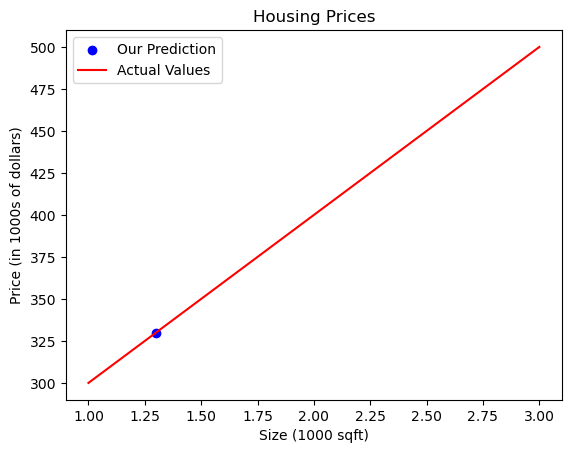

In [33]:
# Plot our model prediction
plt.scatter(house_size, prediction, c='b',label='Our Prediction')

# Plot the data points
plt.plot(x, y, c='r',label='Actual Values')

plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()